# Implementing the ML Algorithms Decision Tree and RandomForest on IRIS dataset 

<h5><b>Objective-</b></h5><h7>Predict the Species of Iris based on its 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'.</h7>

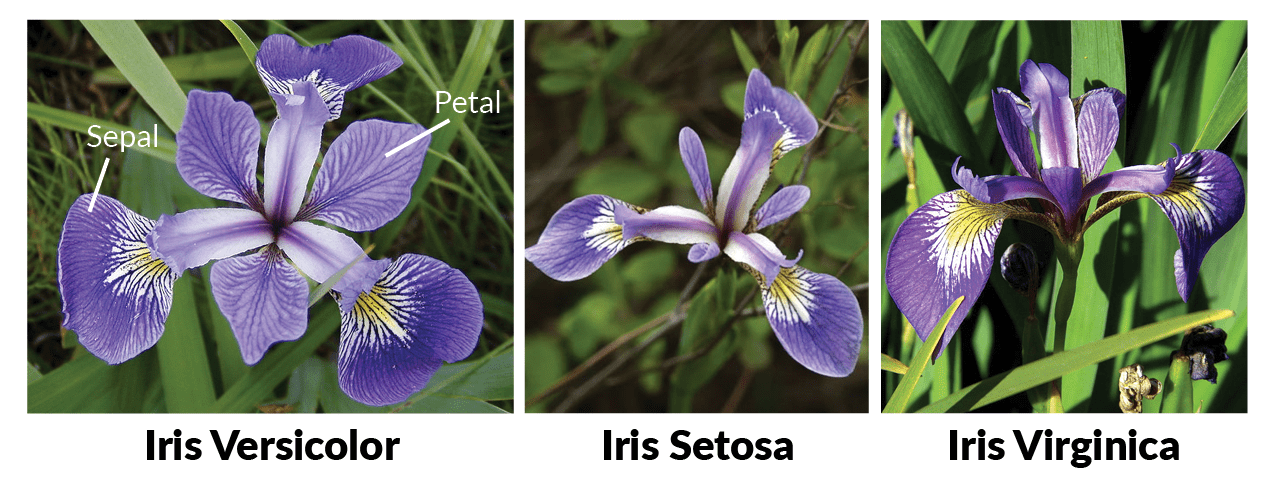

In [3]:
from IPython.display import Image
Image(filename=r'iris.png')

# Loading the IRIS dataset

In [4]:
import numpy as np

In [5]:
import pandas as pd

In [6]:
iris=pd.read_csv('Iris.csv')

In [7]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Exploring the data

In [8]:
! pip install pandas_profiling

In [9]:
from pandas_profiling import ProfileReport

In [10]:
iris_report=ProfileReport(iris)

In [11]:
iris_report

# Data Preparation

In [12]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [13]:
iris.shape

(150, 6)

In [14]:
data=iris.drop(['Id','Species'],axis=1)
target=iris['Species']

In [15]:
data.shape

(150, 4)

In [16]:
target.shape

(150,)

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(data,target,train_size=0.75,random_state=0)

In [19]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(112, 4) (112,)
(38, 4) (38,)


# Training the model-using the Decision Tree

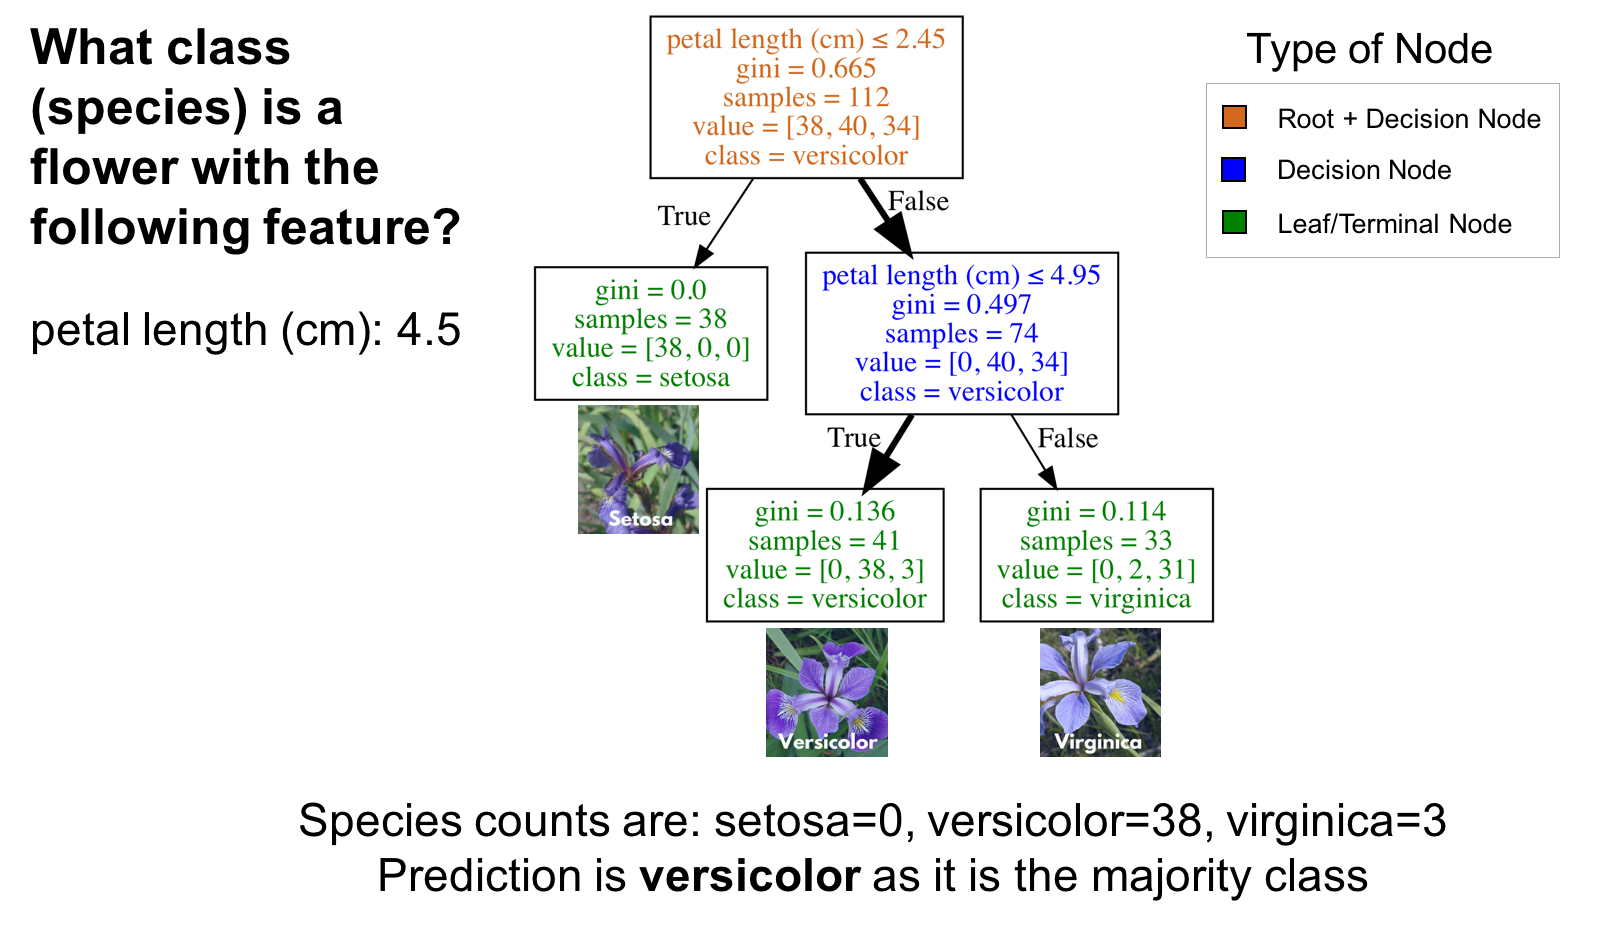

In [20]:
from IPython.display import Image
Image(filename=r'decisiontree.png')

In [21]:
from sklearn.tree import DecisionTreeClassifier

In [22]:
classifier=DecisionTreeClassifier()

In [23]:
classifier.fit(x_train,y_train)

DecisionTreeClassifier()

<h10><b>Prediction</b></h10>

In [24]:
y_test_predict=classifier.predict(x_test)

In [25]:
y_test_predict

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica'], dtype=object)

In [26]:
temp_data=pd.DataFrame({'y_test':y_test,'y_test_pred':y_test_predict})

In [27]:
temp_data.head()

,y_test,y_test_pred
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa


<h10><b>Evaluation</b></h10>

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
from sklearn import metrics

In [30]:
evaluation=metrics.accuracy_score(y_test,y_test_predict)

In [31]:
evaluation

0.9736842105263158

<h10><b>Cross-Verification</b></h10>

In [32]:
classifier.fit(x_test,y_test)

DecisionTreeClassifier()

In [33]:
y_train_predict=classifier.predict(x_train)

In [34]:
y_train_predict

array(['Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris

In [35]:
temp_data3=pd.DataFrame({'y_train':y_train,'y_train_pred':y_train_predict})

In [36]:
temp_data3.head()

,y_train,y_train_pred
61,Iris-versicolor,Iris-versicolor
92,Iris-versicolor,Iris-versicolor
112,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
141,Iris-virginica,Iris-virginica


In [37]:
evaluation_check=metrics.accuracy_score(y_train,y_train_predict)

In [38]:
evaluation_check

0.9642857142857143

# Training the model-using Random Forest

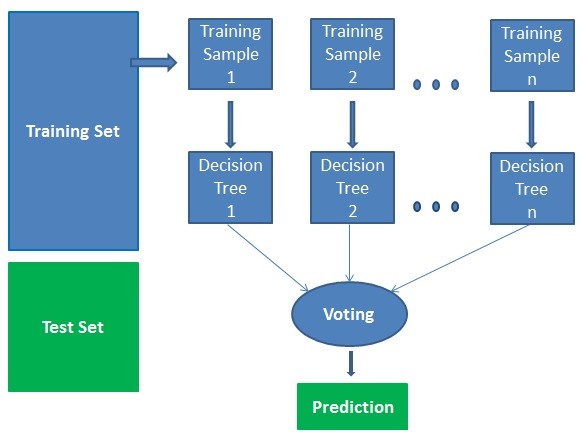

In [39]:
from IPython.display import Image
Image(filename=r'RandomForest.png')

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
classifier1=RandomForestClassifier(max_depth=3)

In [42]:
classifier1.fit(x_train,y_train)

RandomForestClassifier(max_depth=3)

<h10><b>Prediction</b></h10>

In [43]:
y_test_predict1=classifier1.predict(x_test)

In [44]:
temp_data1=pd.DataFrame({'y_test1':y_test,'y_test_predict1':y_test_predict1})

In [45]:
temp_data1.head()

,y_test1,y_test_predict1
114,Iris-virginica,Iris-virginica
62,Iris-versicolor,Iris-versicolor
33,Iris-setosa,Iris-setosa
107,Iris-virginica,Iris-virginica
7,Iris-setosa,Iris-setosa


<h10><b>Evaluation</b></h10>

In [46]:
evaluation1=metrics.accuracy_score(y_test,y_test_predict1)

In [47]:
evaluation1

0.9736842105263158

<h10><b>Cross-Verification</b></h10>

In [48]:
classifier1.fit(x_test,y_test)

RandomForestClassifier(max_depth=3)

In [49]:
y_train_predict11=classifier1.predict(x_train)

In [51]:
temp_data11=pd.DataFrame({'y_train':y_train,'y_train_predict':y_train_predict11})

In [52]:
temp_data11.head()

,y_train,y_train_predict
61,Iris-versicolor,Iris-versicolor
92,Iris-versicolor,Iris-versicolor
112,Iris-virginica,Iris-virginica
2,Iris-setosa,Iris-setosa
141,Iris-virginica,Iris-virginica


In [53]:
evaluation11=metrics.accuracy_score(y_train,y_train_predict11)

In [54]:
evaluation11

0.9553571428571429

# Final Conclusion

<h7>There is not much difference in the accuracy rate of prediction when I performed the Decision Tree and RandomForest algorithms on IRIS dataset.</h7>

# Thanking you